In [1]:
 # Suppresses warnings for cleaner output.
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

# Load datasets from CSV files.
recipes = pd.read_csv("recipes.csv")
ratings = pd.read_csv("interactions.csv")

In [3]:
print(recipes.describe())

                  id       minutes  contributor_id        n_steps  \
count  231637.000000  2.316370e+05    2.316370e+05  231637.000000   
mean   222014.708984  9.398546e+03    5.534885e+06       9.765499   
std    141206.635626  4.461963e+06    9.979141e+07       5.995128   
min        38.000000  0.000000e+00    2.700000e+01       0.000000   
25%     99944.000000  2.000000e+01    5.690500e+04       6.000000   
50%    207249.000000  4.000000e+01    1.736140e+05       9.000000   
75%    333816.000000  6.500000e+01    3.982750e+05      12.000000   
max    537716.000000  2.147484e+09    2.002290e+09     145.000000   

       n_ingredients  
count  231637.000000  
mean        9.051153  
std         3.734796  
min         1.000000  
25%         6.000000  
50%         9.000000  
75%        11.000000  
max        43.000000  


In [4]:
print(ratings.describe())

            user_id     recipe_id        rating
count  1.132367e+06  1.132367e+06  1.132367e+06
mean   1.384291e+08  1.608972e+05  4.411016e+00
std    5.014269e+08  1.303987e+05  1.264752e+00
min    1.533000e+03  3.800000e+01  0.000000e+00
25%    1.354700e+05  5.425700e+04  4.000000e+00
50%    3.309370e+05  1.205470e+05  5.000000e+00
75%    8.045500e+05  2.438520e+05  5.000000e+00
max    2.002373e+09  5.377160e+05  5.000000e+00


In [5]:
print(recipes.shape)
print(ratings.shape)

(231637, 12)
(1132367, 5)


In [6]:
# Print info of datasets for inspection.
print(recipes.info())
print(ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user

In [7]:
# Print columns of both datasets for inspection.
print(recipes.columns)
print(ratings.columns)

Index(['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients'],
      dtype='object')
Index(['user_id', 'recipe_id', 'date', 'rating', 'review'], dtype='object')


In [8]:
# Checking the ratings DataFrame.
ratings

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."
...,...,...,...,...,...
1132362,116593,72730,2003-12-09,0,Another approach is to start making sauce with...
1132363,583662,386618,2009-09-29,5,These were so delicious! My husband and I tru...
1132364,157126,78003,2008-06-23,5,WOW! Sometimes I don't take the time to rate ...
1132365,53932,78003,2009-01-11,4,Very good! I used regular port as well. The ...


In [9]:
# Check for and display any missing values across columns.
print(recipes.isnull().sum())
print(ratings.isnull().sum())

name                 1
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description       4979
ingredients          0
n_ingredients        0
dtype: int64
user_id        0
recipe_id      0
date           0
rating         0
review       169
dtype: int64


In [10]:
# Drop rows with any missing values in the DataFrames.
ratings.dropna(inplace=True)
recipes.dropna(subset=['name'], inplace=True)

# The column 'description' won't be relevant so we won't be dropping those rows
# Instead we are adding a text to fill the null values
recipe_no_description = "Description not available"
recipes['description'].fillna(recipe_no_description, inplace=True)

In [11]:
# Calculate the length of each recipe name
recipes['name_length'] = recipes['name'].apply(len)

# Filter recipes with names less than 4 characters
# That will be relevant for the final search
short_name_recipes = recipes[recipes['name_length'] < 3]

# Display the filtered recipes
print(short_name_recipes[['name', 'name_length']])

Empty DataFrame
Columns: [name, name_length]
Index: []


In [12]:
# Explode the ingredients into individual entries
ingredients_list = recipes['ingredients'].str.split(',').explode().str.strip()

# Create a DataFrame for exploded ingredients
ingredients_df = pd.DataFrame(ingredients_list, columns=['ingredient'])

# Calculate the length of each ingredient name
ingredients_df['ingredient_length'] = ingredients_df['ingredient'].apply(len)

# Filter ingredients with names less than 3 characters
short_name_ingredients = ingredients_df[ingredients_df['ingredient_length'] < 3]

# Display the filtered ingredients
print(short_name_ingredients)


Empty DataFrame
Columns: [ingredient, ingredient_length]
Index: []


## EDA

### Exploring some data details

In [13]:
import matplotlib.pyplot as plt

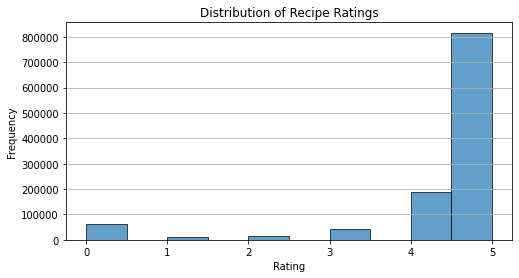

In [14]:
# This histogram shows the frequency distribution of recipe ratings
plt.figure(figsize=(8, 4))
plt.hist(ratings['rating'], edgecolor='k', alpha=0.7)
plt.title('Distribution of Recipe Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

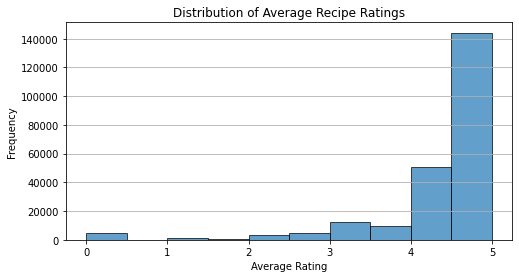

In [15]:
# This histogram shows the distribution of average ratings per recipe, 
# indicating how recipes are rated.
average_ratings = ratings.groupby('recipe_id')['rating'].mean()
plt.figure(figsize=(8, 4))
plt.hist(average_ratings, edgecolor='k', alpha=0.7)
plt.title('Distribution of Average Recipe Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

Top 10 most frequent recipes:


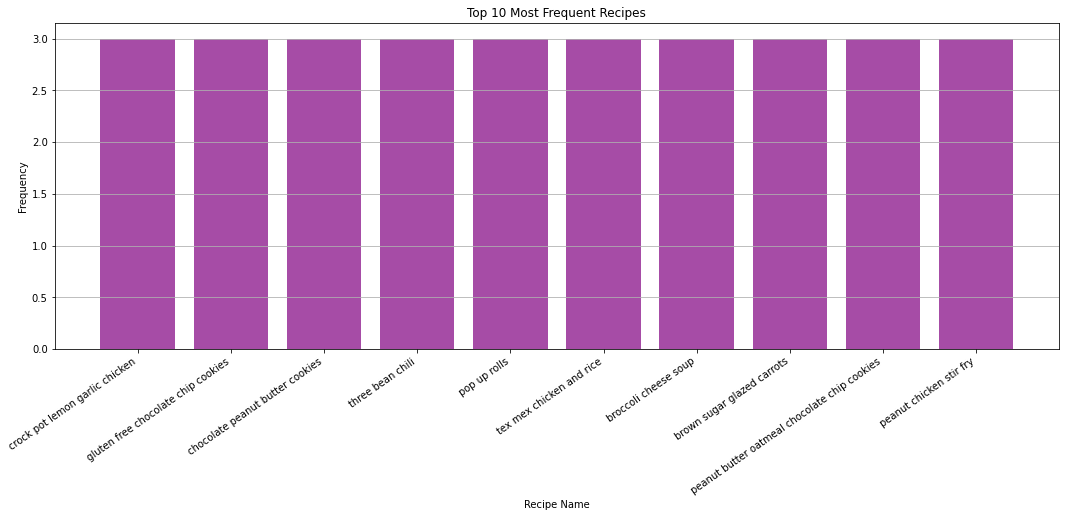

Top 10 most common ingredients:
'salt'             78127
'butter'           38862
'sugar'            38756
'onion'            35739
'eggs'             28726
'water'            27119
'garlic cloves'    24459
'olive oil'        23934
'milk'             21359
'flour'            19695
Name: ingredients, dtype: int64


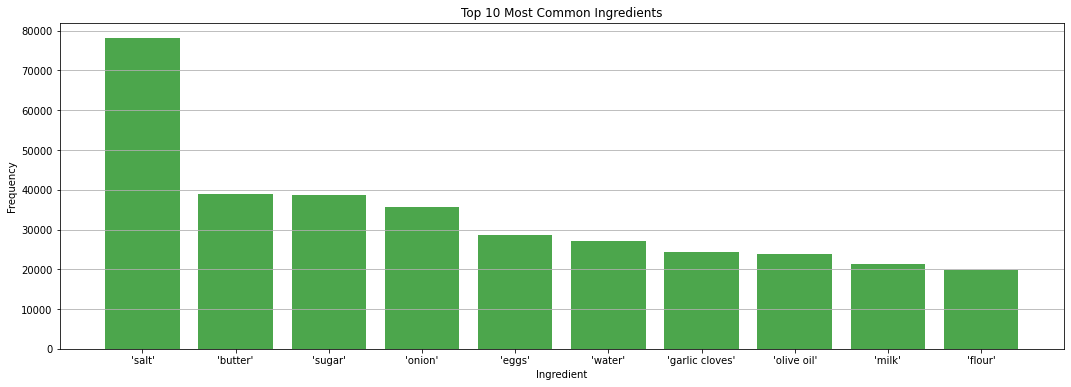

In [16]:
# Top 10 most frequent recipes
# The chart shows the recipe names that repeat the most in the dataset
# Duplicates will be trated later
top_recipes = recipes['name'].value_counts().head(10)
print("Top 10 most frequent recipes:")
# print(top_recipes)

plt.figure(figsize=(18, 6))
plt.bar(top_recipes.index, top_recipes.values, color='purple', alpha=0.7)
plt.title('Top 10 Most Frequent Recipes')
plt.xlabel('Recipe Name')
plt.ylabel('Frequency')
plt.xticks(rotation=35, ha='right')
plt.grid(axis='y')
plt.show()

# Top 10 most common ingredients
ingredients_list = recipes['ingredients'].str.split(',').explode().str.strip()
top_ingredients = ingredients_list.value_counts().head(10)
print("Top 10 most common ingredients:")
print(top_ingredients)

plt.figure(figsize=(18, 6))
plt.bar(top_ingredients.index, top_ingredients.values, color='green', alpha=0.7)
plt.title('Top 10 Most Common Ingredients')
plt.xlabel('Ingredient')
plt.ylabel('Frequency')
plt.xticks()
plt.grid(axis='y')
plt.show()


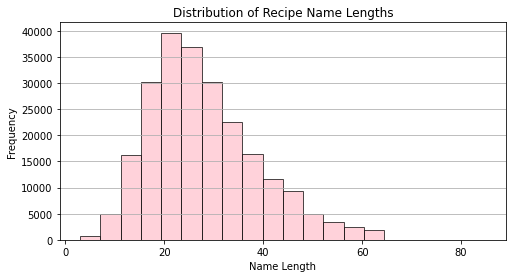

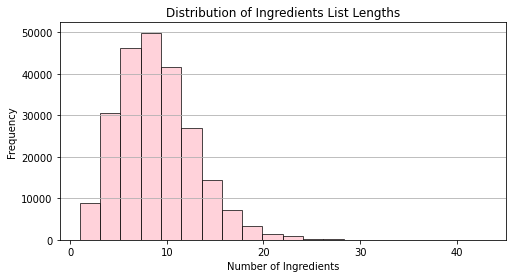

In [17]:
# Length of recipe names
recipes['name_length'] = recipes['name'].apply(len)

plt.figure(figsize=(8, 4))
plt.hist(recipes['name_length'], bins=20, color='pink', edgecolor='k', alpha=0.7)
plt.title('Distribution of Recipe Name Lengths')
plt.xlabel('Name Length')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

# Length of ingredients lists
recipes['ingredients_length'] = recipes['ingredients'].apply(lambda x: len(x.split(',')))

plt.figure(figsize=(8, 4))
plt.hist(recipes['ingredients_length'], bins=20, color='pink', edgecolor='k', alpha=0.7)
plt.title('Distribution of Ingredients List Lengths')
plt.xlabel('Number of Ingredients')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


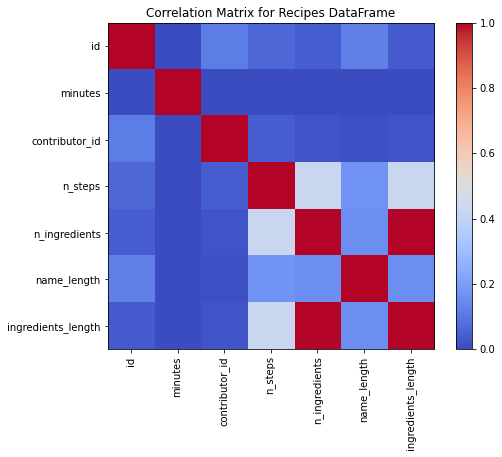

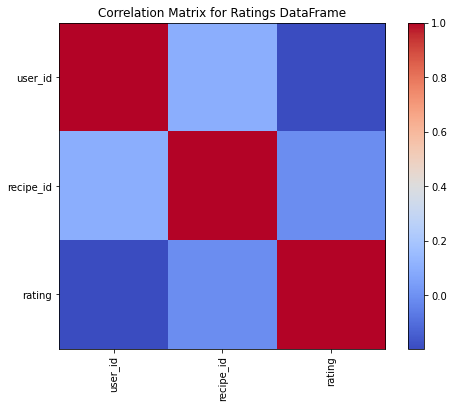

In [18]:
# Calculate the correlation matrix
correlation_matrix_recipes = recipes.corr()

# Plot the correlation matrix using Matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix_recipes, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(correlation_matrix_recipes.columns)), correlation_matrix_recipes.columns, rotation=90)
plt.yticks(range(len(correlation_matrix_recipes.columns)), correlation_matrix_recipes.columns)
plt.title('Correlation Matrix for Recipes DataFrame')
plt.show()


correlation_matrix_ratings = ratings.corr()

# Plot the correlation matrix using Matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix_ratings, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(correlation_matrix_ratings.columns)), correlation_matrix_ratings.columns, rotation=90)
plt.yticks(range(len(correlation_matrix_ratings.columns)), correlation_matrix_ratings.columns)
plt.title('Correlation Matrix for Ratings DataFrame')
plt.show()

In [19]:
# Create new DataFrames with essential columns for further analysis.
recipes_df = recipes[['id','name', 'ingredients']]
ratings_df = ratings[['user_id', 'recipe_id', 'rating']]

In [20]:
# Rename 'id' column to 'recipe_id' to maintain consistency across DataFrames
recipes_df.rename(columns={'id': 'recipe_id'}, inplace=True)

In [21]:
duplicates = recipes.duplicated(subset=['name', 'ingredients'], keep=False) 
duplicates_recipes = recipes[duplicates]
duplicates_recipes 

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,name_length,ingredients_length
39632,cheese stuffed pecans,249615,50,283251,2007-08-29,"['60-minutes-or-less', 'time-to-make', 'course...","[46.9, 7.0, 0.0, 0.0, 1.0, 4.0, 0.0]",5,['in a mixing bowl combine the cheese and sour...,oh wow do these look yummy! and easy! wouldn’t...,"['gouda cheese', 'sour cream', 'pecan halves']",3,21,3
39727,cheese stuffed pecans,200968,30,37449,2006-12-18,"['30-minutes-or-less', 'time-to-make', 'course...","[46.9, 7.0, 0.0, 0.0, 1.0, 4.0, 0.0]",8,"['toast the pecans in a 325f', 'oven for 10 mi...",an easy and tasty little appetizer! adapted fr...,"['gouda cheese', 'sour cream', 'pecan halves']",3,21,3
49711,chocolate cherry ice cream pie,242922,135,57400,2007-07-29,"['time-to-make', 'course', 'preparation', '5-i...","[540.8, 38.0, 242.0, 14.0, 13.0, 50.0, 25.0]",9,"['following package directions , drizzle half ...",from taste of home's simple and delicious,"['magic shell ice cream topping', 'graham crac...",5,30,5
52021,chocolate cherry ice cream pie,234893,135,461931,2007-06-14,"['time-to-make', 'course', 'preparation', '5-i...","[468.3, 31.0, 213.0, 12.0, 10.0, 41.0, 22.0]",12,"['following package directions , drizzle half ...",i got this out of taste of home's simple and d...,"['magic shell ice cream topping', 'graham crac...",5,30,5
53807,cinnamon nutmeg whipped cream,505907,15,731027,2013-08-15,"['15-minutes-or-less', 'time-to-make', 'course...","[339.5, 45.0, 66.0, 1.0, 3.0, 91.0, 6.0]",6,['add heavy cream and sugar in a large bowl an...,perfect topping for pumpkin pie!,"['heavy cream', 'sugar', 'cinnamon', 'nutmeg']",4,29,4
54026,cinnamon sugar biscotti,79890,80,73836,2003-12-31,"['time-to-make', 'course', 'preparation', 'occ...","[66.7, 3.0, 23.0, 1.0, 2.0, 6.0, 3.0]",22,"['preheat oven to 325f', 'mix flour , 1 1 / 2 ...","these crisp, twice baked cookies are delicious...","['all-purpose flour', 'ground cinnamon', 'baki...",9,23,9
54206,cinnamon sugar biscotti,97567,85,125349,2004-08-11,"['time-to-make', 'course', 'preparation', 'for...","[66.8, 3.0, 24.0, 1.0, 2.0, 6.0, 3.0]",23,['preheat oven to 325f line 2 large baking she...,great with a coffee or just for a treat.,"['all-purpose flour', 'ground cinnamon', 'baki...",9,23,9
54220,cinnamon nutmeg whipped cream,78053,5,68884,2003-12-06,"['15-minutes-or-less', 'time-to-make', 'course...","[2036.7, 271.0, 402.0, 7.0, 19.0, 548.0, 38.0]",5,['add heavy cream and sugar in a large bowl an...,absolutely delicious homemade whipped cream. t...,"['heavy cream', 'sugar', 'cinnamon', 'nutmeg']",4,29,4
59242,country style pot roast,156573,210,53959,2006-02-17,"['time-to-make', 'course', 'main-ingredient', ...","[334.1, 11.0, 9.0, 22.0, 78.0, 13.0, 8.0]",18,"['in dutch oven or 6-quart saucepot , brown ro...",from a lipton recipe secrets newsletter.,"['boneless beef roast', 'lipton recipe secrets...",6,23,6
59291,country style pot roast,361257,490,720932,2009-03-16,"['course', 'main-ingredient', 'preparation', '...","[341.1, 12.0, 10.0, 31.0, 78.0, 13.0, 9.0]",11,"['add vegetables , then roast in slow cooker',...",a true crowd pleaser!,"['boneless beef roast', 'lipton recipe secrets...",6,23,6


In [22]:
# Remove duplicate recipes, keeping only the first occurrence
recipes = recipes.drop_duplicates(subset=['name', 'ingredients'])

In [23]:
# Save the new datasets to new CSV files
recipes_df.to_csv('recipes_df.csv', index=False)
ratings_df.to_csv('ratings_df.csv', index=False)

In [24]:
# Print columns of the modified recipes DataFrame to confirm changes.
print(recipes_df.columns)
print(ratings_df.columns)

Index(['recipe_id', 'name', 'ingredients'], dtype='object')
Index(['user_id', 'recipe_id', 'rating'], dtype='object')


In [25]:
# Calculate the average rating for each recipe
average_ratings = ratings_df.groupby('recipe_id')['rating'].mean().reset_index()
average_ratings.columns = ['recipe_id', 'average_rating']

# Round the average rating to 2 decimal places
average_ratings['average_rating'] = average_ratings['average_rating'].round(2)

In [26]:
# Merge the average ratings with the recipes DataFrame
recipes_df = pd.merge(recipes_df, average_ratings, on='recipe_id', how='inner')

In [27]:
recipes_df

,recipe_id,name,ingredients,average_rating
0,137739,arriba baked winter squash mexican style,"['winter squash', 'mexican seasoning', 'mixed ...",5.0
1,31490,a bit different breakfast pizza,"['prepared pizza crust', 'sausage patty', 'egg...",3.5
2,112140,all in the kitchen chili,"['ground beef', 'yellow onions', 'diced tomato...",4.0
3,59389,alouette potatoes,"['spreadable cheese with garlic and herbs', 'n...",4.5
4,44061,amish tomato ketchup for canning,"['tomato juice', 'apple cider vinegar', 'sugar...",5.0
...,...,...,...,...
231624,486161,zydeco soup,"['celery', 'onion', 'green sweet pepper', 'gar...",5.0
231625,493372,zydeco spice mix,"['paprika', 'salt', 'garlic powder', 'onion po...",5.0
231626,308080,zydeco ya ya deviled eggs,"['hard-cooked eggs', 'mayonnaise', 'dijon must...",5.0
231627,298512,cookies by design cookies on a stick,"['butter', 'eagle brand condensed milk', 'ligh...",1.0


In [28]:
# Import regex library for name cleaning.
import re

# Function to clean recipe names.
pattern = re.compile("[^a-zA-Z0-9 ]+")

def clean_text(text):
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()
        # Remove special characters
        text = pattern.sub("", text)
        # Remove leading/trailing spaces
        text = text.strip()
    return text

# Apply the cleaning function to recipe names.
recipes_df["clean_name"] = recipes_df["name"].apply(clean_text)
recipes_df["clean_ingredients"] = recipes_df["ingredients"].apply(clean_text)

In [29]:
# Import necessary libraries for text processing and similarity calculations
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Initialize the TfidfVectorizer object with ngram_range set to (1,2).
# This setup makes the vectorizer consider single words and pairs of words.
vectorizer = TfidfVectorizer(ngram_range=(1,2))

# Generate the TF-IDF matrix for the cleaned names of recipes.
# This matrix helps in quantifying the importance of words 
# based on their occurrence frequency across the data
tfidf = vectorizer.fit_transform(recipes_df["clean_name"])

In [30]:
# # Function to calculate the position-based weight for ingredients
# def position_weight(ingredients, search_text):
#     ingredients_list = ingredients.split(',')
#     search_terms = search_text.split()
#     weight = 0
#     for i, ingredient in enumerate(ingredients_list):
#         for term in search_terms:
#             if term in ingredient:
#                 weight += 1 / (i + 1)  # Higher weight for earlier positions
#     return weight

In [31]:
# Function to find recipes similar to the user's search query based on text content
def find_similar_recipes_by_text(search_text, based_on='ingredients', top_results=10):
    # Initialize a TF-IDF vectorizer with specified token patterns
    tfidf_vectorizer = TfidfVectorizer(token_pattern=r"(?u)\b\w+\b", ngram_range=(1, 2))
    
    # Determine whether to compare based on the 'name' or 'ingredients' of recipes
    data_to_compare = recipes_df['clean_name'] if based_on == 'name' else recipes_df['ingredients']
    # Transform the data into a TF-IDF matrix
    tfidf_matrix = tfidf_vectorizer.fit_transform(data_to_compare)
    # Transform the search query into a TF-IDF vector
    search_tfidf = tfidf_vectorizer.transform([search_text])
    
    # Compute cosine similarity between the search query vector and all recipe vectors
    cosine_similarities = cosine_similarity(search_tfidf, tfidf_matrix).flatten()
    
    # Create a DataFrame for results
    results_df = pd.DataFrame({
        'recipe_id': recipes_df['recipe_id'],
        'name': recipes_df['name'],
        'ingredients': recipes_df['ingredients'],
        'average_rating': recipes_df['average_rating'],
        'similarity': cosine_similarities
    })
    
    # # Filter out recipes with similarity below 0.3
    # results_df = results_df[results_df['similarity'] > 0.3]
    
       # # Calculate position-based weight for ingredients
    # results_df['position_weight'] = results_df['ingredients'].apply(lambda x: position_weight(x, search_text))
    
    # # Score recipes based on similarity, ratings, and position weight
    # results_df['score'] = (
    #    results_df['similarity'] +
    #    (results_df['average_rating'] / results_df['average_rating'].max() * 0.5) +
    #    results_df['position_weight']
    # )    

    # Score recipes based on similarity and ratings
    results_df['score'] = results_df['similarity'] + (results_df['average_rating'] / results_df['average_rating'].max() * 0.5)
    
    # Round similarity and score to 2 decimal places
    results_df['similarity'] = results_df['similarity'].round(2)
    results_df['score'] = results_df['score'].round(2)
    
    # Sort and filter results by the combined score, and select the top results
    results_df = results_df.sort_values('score', ascending=False).head(top_results)
    return results_df


In [32]:
# Setup interactive widgets for the user interface
import ipywidgets as widgets
from IPython.display import display, HTML

# Text input widget for entering the recipe name
recipe_name_input = widgets.Text(
    value='',
    placeholder='Type a recipe name',
    description='Recipe:',
    disabled=False
)

# Dropdown widget for selecting the basis of similarity (name or ingredients)
similarity_basis_input = widgets.Dropdown(
    options=['name', 'ingredients'],
    value='ingredients',
    description='Based on:',
    disabled=False
)

# Container for displaying recommendation list.
recommendation_list = widgets.Output()

In [33]:
# Create the search button widget
search_button = widgets.Button(
    description='Search',
    disabled=False,
    tooltip='Click to search for similar recipes'
)

In [34]:
# Function to handle button click event
def on_click_search(b):
    with recommendation_list:
        # Clear previous results
        recommendation_list.clear_output()
        # Retrieve the text input
        name = recipe_name_input.value
        # Trigger search when user has typed at least 4 characters
        if len(name) >= 3:
            # Find similar recipes based on the current value in the similarity basis dropdown
            similar_recipes = find_similar_recipes_by_text(name, based_on=similarity_basis_input.value)
            # Display the results if not empty
            if not similar_recipes.empty:
                display(HTML(similar_recipes.to_html(index=False)))
#                 display(similar_recipes)
            else:
                print("No similar recipes were found. Please, check the search arguments.")
        else:
            print("Please type at least 3 characters.")

# Clear search box and result output
recipe_name_input.value = ''
recommendation_list.clear_output()            

# Attach the function to the button click event
search_button.on_click(on_click_search)

# Display widgets and the output container
display(recipe_name_input, similarity_basis_input, search_button, recommendation_list)



Text(value='', description='Recipe:', placeholder='Type a recipe name')

Dropdown(description='Based on:', index=1, options=('name', 'ingredients'), value='ingredients')

Button(description='Search', style=ButtonStyle(), tooltip='Click to search for similar recipes')

Output()